In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('/Users/devonbancroft/Desktop/Devon-GA-DAT-10-14/Data/hitters.csv')

In [3]:
df.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,293,66,1,30,29,14,1,293,66,1,30,29,14,A,E,446,33,20,NaN,A
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N


In [4]:
#Create mean squared error function
def mse(idx, target):
    error = target[idx].mean() - target[idx]
    return np.mean(error**2)

In [5]:
X = df.loc[:, df.columns!='Salary']
y = df.Salary

In [6]:
total_error = mse(X.index, y)
total_error

202734.26915834736

In [7]:
query = df.RBI < 100

In [8]:
query.head()

0    True
1    True
2    True
3    True
4    True
Name: RBI, dtype: bool

In [9]:
left = df[query].copy()
right = df[~query].copy()

In [10]:
left_error = mse(left.index, y)
left_error

168406.68785966877

In [11]:
right_error = mse(right.index, y)
right_error

564282.2894012296

In [12]:
df.shape[0]

322

In [13]:
#importing a tree

In [14]:
from sklearn.tree import DecisionTreeRegressor
tree = DecisionTreeRegressor()

In [15]:
tree

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [16]:
tree.get_params()

{'criterion': 'mse',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': False,
 'random_state': None,
 'splitter': 'best'}

In [17]:
#import random forest

In [18]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()

In [19]:
rf.get_params()

{'bootstrap': True,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 'warn',
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [20]:
X = df.loc[:, df.isnull().sum()==0]

In [21]:
df = df.dropna()

In [22]:
X = df.loc[:,df.columns!='Salary']
X = X.select_dtypes(include=np.number)
y = df.Salary

In [23]:
rf.fit(X,y)

/Users/devonbancroft/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [24]:
rf.estimators_

[DecisionTreeRegressor(criterion='mse', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       presort=False, random_state=103183242, splitter='best'),
 DecisionTreeRegressor(criterion='mse', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       presort=False, random_state=884909309, splitter='best'),
 DecisionTreeRegressor(criterion='mse', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, 

In [25]:
from sklearn.tree import export_graphviz
import IPython
import graphviz
import re

def draw_tree(t, df, size=10, ratio=0.6, precision=0):
    """ Draws a representation of a random forest in IPython.
    Parameters:
    -----------
    t: The tree you wish to draw
    df: The data used to train the tree. This is used to get the names of the features.
    """
    s=export_graphviz(t, out_file=None, feature_names=df.columns, filled=True,
                      special_characters=True, rotate=True, precision=precision)
    IPython.display.display(graphviz.Source(re.sub('Tree {',
       f'Tree {{ size={size}; ratio={ratio}', s)))

In [26]:
tree.fit(X,y)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

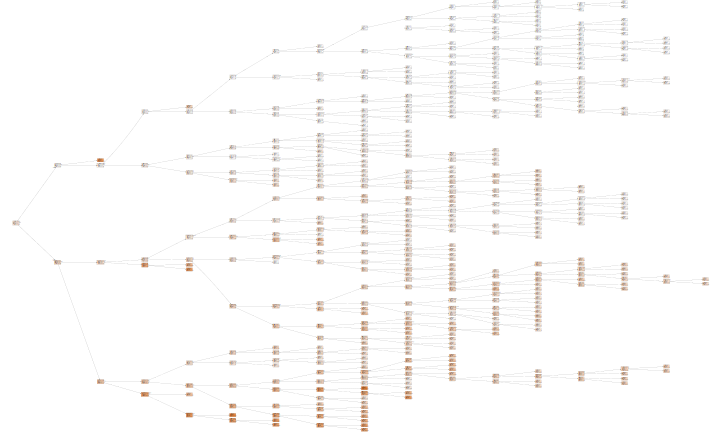

In [27]:
draw_tree(tree, X)

In [28]:
#testing out with kaggle

In [29]:
train = pd.read_csv('/Users/devonbancroft/Desktop/DAT-10-14/class material/Unit3/Data/iowa_housing/train.csv', usecols=[1, 17, 18, 19, 43, 44, 46, 49, 50, 70, 77, 80])
test  = pd.read_csv('/Users/devonbancroft/Desktop/DAT-10-14/class material/Unit3/Data/iowa_housing/test.csv', usecols=[1, 17, 18, 19, 43, 44, 46, 49, 50, 70, 77])

In [30]:
train.head()

,MSSubClass,OverallQual,OverallCond,YearBuilt,1stFlrSF,2ndFlrSF,GrLivArea,FullBath,HalfBath,ScreenPorch,YrSold,SalePrice
0,60,7,5,2003,856,854,1710,2,1,0,2008,208500
1,20,6,8,1976,1262,0,1262,2,0,0,2007,181500
2,60,7,5,2001,920,866,1786,2,1,0,2008,223500
3,70,7,5,1915,961,756,1717,1,0,0,2006,140000
4,60,8,5,2000,1145,1053,2198,2,1,0,2008,250000


In [31]:
test.head()

,MSSubClass,OverallQual,OverallCond,YearBuilt,1stFlrSF,2ndFlrSF,GrLivArea,FullBath,HalfBath,ScreenPorch,YrSold
0,20,5,6,1961,896,0,896,1,0,120,2010
1,20,6,6,1958,1329,0,1329,1,1,0,2010
2,60,5,5,1997,928,701,1629,2,1,0,2010
3,60,6,6,1998,926,678,1604,2,1,0,2010
4,120,8,5,1992,1280,0,1280,2,0,144,2010


In [32]:
train.isnull().sum()

MSSubClass     0
OverallQual    0
OverallCond    0
YearBuilt      0
1stFlrSF       0
2ndFlrSF       0
GrLivArea      0
FullBath       0
HalfBath       0
ScreenPorch    0
YrSold         0
SalePrice      0
dtype: int64

In [33]:
X_train, y_train = train.loc[:, train.columns != 'SalePrice'], np.log(train['SalePrice'])

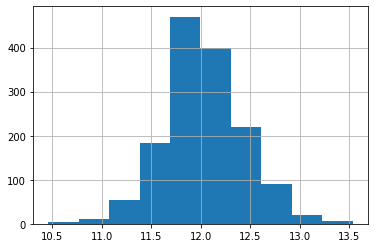

In [34]:
y_train.hist()

In [35]:
def rmse(estimator, X, y):
    preds  = estimator.predict(X)
    error = np.sqrt(np.mean((preds - y)**2))
    return error

In [36]:
from sklearn.model_selection import cross_val_score

rf = RandomForestRegressor()

samples_per_leaf = [1, 5, 10, 15, 25, 50]
rf_scores = []


for num_samples in samples_per_leaf:
    rf.set_params(min_samples_leaf=num_samples)
    scores = cross_val_score(estimator=rf, X=X_train, y=y_train, scoring=rmse, cv=10)
    rf_scores.append((np.mean(scores), num_samples))

/Users/devonbancroft/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/devonbancroft/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/devonbancroft/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/devonbancroft/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/devon

/Users/devonbancroft/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/devonbancroft/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/devonbancroft/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/devonbancroft/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/devon

In [37]:
rf_scores

[(0.1639765217531562, 1),
 (0.1646144471534678, 5),
 (0.16882909851159045, 10),
 (0.17162676900808876, 15),
 (0.1803747139189262, 25),
 (0.1966609235781171, 50)]

In [38]:
rf.fit(X_train,y_train)

/Users/devonbancroft/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=50, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [39]:
test['Prediction'] = rf.predict(test)

In [40]:
np.exp(test.Prediction)

0       124515.955616
1       147333.471594
2       155333.590052
3       171629.558788
4       256142.520172
5       179551.957554
6       158189.150524
7       171629.558788
8       202084.253285
9       110533.040419
10      200612.313641
11      113405.227514
12      113405.227514
13      165396.431248
14      175412.006873
15      313802.272025
16      256142.520172
17      280439.485551
18      296577.771472
19      343568.680718
20      322746.620795
21      256142.520172
22      163778.094874
23      175412.006873
24      175412.006873
25      189451.569583
26      313802.272025
27      256142.520172
28      176699.045950
29      170165.142910
            ...      
1429     93470.121480
1430    163733.484722
1431     95484.096141
1432    139534.760963
1433     93470.121480
1434    280439.485551
1435    256142.520172
1436    170165.142910
1437    168997.743461
1438    256142.520172
1439    156534.865770
1440    158835.477605
1441    167156.686924
1442    314726.970636
1443    29

In [41]:
output = pd.DataFrame({
    'Id'       : np.arange(1461, 2920),
    'SalePrice': np.exp(test.Prediction)
})

In [42]:
output.head()

,Id,SalePrice
0,1461,124515.955616
1,1462,147333.471594
2,1463,155333.590052
3,1464,171629.558788
4,1465,256142.520172


In [45]:
output.dtypes

Id             int64
SalePrice    float64
dtype: object

In [46]:
output.shape

(1459, 2)

In [47]:
output.describe()

,Id,SalePrice
count,1459.000000,1459.000000
mean,2190.000000,175762.541780
std,421.321334,63004.602002
min,1461.000000,93470.121480
25%,1825.500000,130220.569763
50%,2190.000000,155333.590052
75%,2554.500000,202084.253285
max,2919.000000,343568.680718


In [44]:
aas output.to_csv('sample_predictions_class.csv', index=False)

SyntaxError: invalid syntax (<ipython-input-44-a5907698cbdb>, line 1)